<a href="https://colab.research.google.com/github/IrinaBoyarchukova/A_B_test/blob/main/Sem5_A_B_testirovania.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# импорт необходимых библиотек
import plotly.graph_objects as go # Для построения графиков
from scipy import stats # Для расчёта ститистик
import numpy as np # Для работы с массивами данных

**Непрерывная метрика**

In [17]:
#np.random.seed(42)
# Вводим исходные данные по выборкам
sample_1_mean, sample_2_mean = 260, 270 
sample_1_se, sample_2_se = 20, 40
sample_1_size, sample_2_size = 1000, 1200
# Генерируем нормальное распределение на основе введенных данных
norm_1 = np.random.normal(loc=sample_1_mean, scale=sample_1_se, size=sample_1_size)
norm_2 = np.random.normal(loc=sample_2_mean, scale=sample_2_se, size=sample_2_size)

In [19]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=norm_1, name='norm_1'))
fig.add_trace(go.Histogram(x=norm_2, name='norm_2'))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.5)
fig.show()

In [20]:
# tt тест
# Считаем статистику по выборкам нормальное распределение
tvalue, pvalue = stats.ttest_ind(norm_1, norm_2, equal_var=False)

md = sample_1_mean - sample_2_mean
se = md / tvalue

print(f"Difference between samples: {md}, standart error: {se}, p_value: {pvalue}")

if pvalue < .05:
    print(f"Sample # {1 if md > 0 else 2} mean is greater")
else:
    print("No significant difference Поправка Велша")

Difference between samples: -10, standart error: 1.1515409369201457, p_value: 8.425408100872826e-18
Sample # 2 mean is greater


In [21]:
#Простой способ посчитать доверительный интервал
left = md - 1.96 * se
right = md + 1.96 * se

left, right

(-12.257020236363486, -7.742979763636514)

In [22]:
#Через scipy.stats
stats.norm.interval(.95, loc=md, scale=se)

(-12.256978763086996, -7.743021236913004)

In [23]:
#Через бутсрап
m = []
for _ in range(1000):
    c = np.random.choice(norm_1, size=1200, replace=True).mean()
    t = np.random.choice(norm_2, size=1200, replace=True).mean()
    m.append(c-t)
np.percentile(m, [2.5, 97.5])

array([-14.07550242,  -9.00691914])

In [24]:
#Что если распределение не нормальное?
# Генерируем экспоненциальное распределение на основе введенных данных
expon_1 = stats.expon(loc=sample_1_mean, scale=sample_1_se).rvs(sample_1_size)
expon_2 = stats.expon(loc=sample_2_mean, scale=sample_2_se).rvs(sample_2_size)
fig = go.Figure()
fig.add_trace(go.Histogram(x=expon_1, name='expon_1'))
fig.add_trace(go.Histogram(x=expon_2, name='expon_2'))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

In [26]:
# Считаем статистику по выборкам
tvalue, pvalue = stats.mannwhitneyu(expon_1, expon_2)

md = expon_1.mean() - expon_2.mean()
se = md / tvalue

print(f"Difference between samples: {md}, standart error: {se}, p_value: {pvalue}")

if pvalue < .05:
    print(f"Sample # {1 if md > 0 else 2} mean is greater")
else:
    print("No significant difference")
md = expon_1.mean() - expon_2.mean()

Difference between samples: -30.148656161358247, standart error: -0.00012978551572716813, p_value: 1.3032962687450903e-135
Sample # 2 mean is greater


In [27]:
# Считаем статистику по выборкам
mwvalue, pvalue = stats.mannwhitneyu(expon_1, expon_2)

md = sample_1_mean - sample_2_mean
se = md / mwvalue

print(f"Difference between samples: {md}, standart error: {se}, p_value: {pvalue}")

if pvalue < .05:
    print(f"Sample # {1 if md > 0 else 2} mean is greater")
else:
    print("No significant difference")

Difference between samples: -10, standart error: -4.3048524296587115e-05, p_value: 1.3032962687450903e-135
Sample # 2 mean is greater


**Метрика пропорций**

In [28]:
# Вводим исходные данные по выборкам
sample_1_converted, sample_2_converted = 164, 228
sample_1_size, sample_2_size = 15500, 15500
prob_1 = sample_1_converted / sample_1_size
prob_2 = sample_2_converted / sample_2_size

In [29]:
# Вводим исходные данные по выборкам
# Генерируем распределение Бернулли на основе введенных данных
bernoulli_1 = stats.bernoulli.rvs(prob_1, size=sample_1_size)
bernoulli_2 = stats.bernoulli.rvs(prob_2, size=sample_2_size)

In [30]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=bernoulli_1, name='bernoulli_1',))
fig.add_trace(go.Histogram(x=bernoulli_2, name='bernoulli_2',))

# Overlay both histograms
fig.update_layout()
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.5)
fig.show()

In [31]:
# Считаем статистику по выборкам
se = np.sqrt((prob_1 * (1 - prob_1) / sample_1_size) + (prob_2 * (1 - prob_2) / sample_2_size))
z_score = (prob_1 - prob_2) / se
pvalue = stats.norm.sf(abs(z_score)) * 2

md = prob_1 - prob_2

print(f"Difference between samples: {md}, standart error: {se}, p_value: {pvalue}")

if pvalue < .05:
    print(f"Sample # {1 if md > 0 else 2} mean is greater")
else:
    print("No significant difference")

Difference between samples: -0.004129032258064515, standart error: 0.0012690356490794444, p_value: 0.0011392168150319737
Sample # 2 mean is greater


In [32]:
# Считаем доверительный интервал
left = md - 1.96 * se
right = md + 1.96 * se

left, right

(-0.006616342130260227, -0.0016417223858688043)

Задача 2 
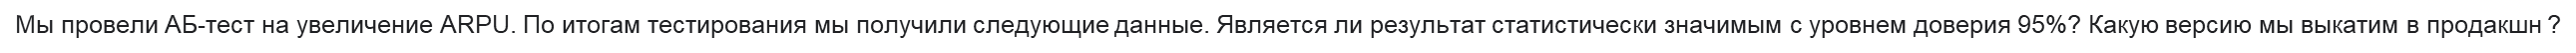

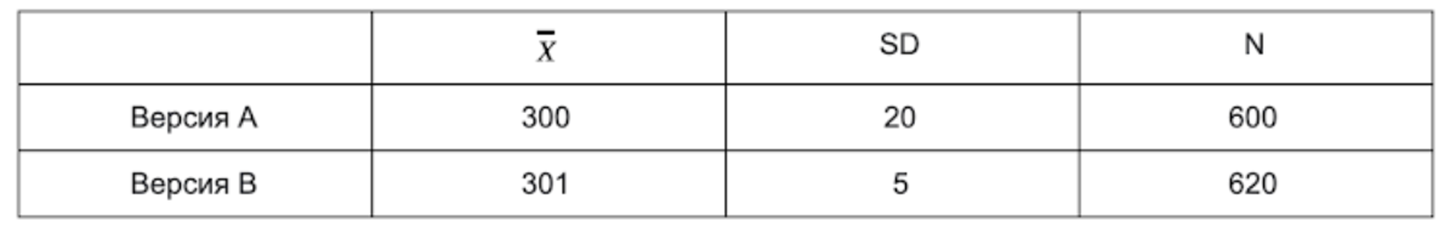

In [15]:
# Вводим исходные данные по выборкам
sample_1_mean, sample_2_mean = 300, 301 
sample_1_se, sample_2_se = 20, 5
sample_1_size, sample_2_size = 600, 620
# Генерируем нормальное распределение на основе введенных данных
sample_1 = np.random.normal(loc=sample_1_mean, scale=sample_1_se, size=sample_1_size)
sample_2 = np.random.normal(loc=sample_2_mean, scale=sample_2_se, size=sample_2_size)

In [16]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=sample_1, name='sample_1'))
fig.add_trace(go.Histogram(x=sample_2, name='sample_2'))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.5)
fig.show()

In [17]:
# tt тест
# Считаем статистику по выборкам нормальное распределение
tvalue, pvalue = stats.ttest_ind(sample_1, sample_2, equal_var=False)

md = sample_1_mean - sample_2_mean
se = md / tvalue

print(f"Difference between samples: {md}, standart error: {se}, p_value: {pvalue}")

if pvalue < .05:
    print(f"Sample # {1 if md > 0 else 2} mean is greater")
else:
    print("No significant difference Поправка Велша")

Difference between samples: -1, standart error: 1.1551764804715203, p_value: 0.38698073079893214
No significant difference Поправка Велша


In [18]:
expon_1 = stats.expon(loc=sample_1_mean, scale=sample_1_se).rvs(sample_1_size)
expon_2 = stats.expon(loc=sample_2_mean, scale=sample_2_se).rvs(sample_2_size)
fig = go.Figure()
fig.add_trace(go.Histogram(x=expon_1, name='expon_1'))
fig.add_trace(go.Histogram(x=expon_2, name='expon_2'))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

In [20]:
tvalue, pvalue = stats.mannwhitneyu(expon_1, expon_2)

md = expon_1.mean() - expon_2.mean()
se = md / tvalue

print(f"Difference between samples: {md}, standart error: {se}, p_value: {pvalue}")

if pvalue < .05:
    print(f"Sample # {1 if md > 0 else 2} mean is greater")
else:
    print("No significant difference")
md = expon_1.mean() - expon_2.mean()

Difference between samples: 13.671523873020988, standart error: 4.856738238916712e-05, p_value: 2.467282520306485e-54
Sample # 1 mean is greater


3адача 3 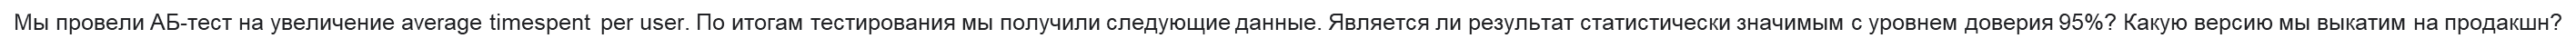
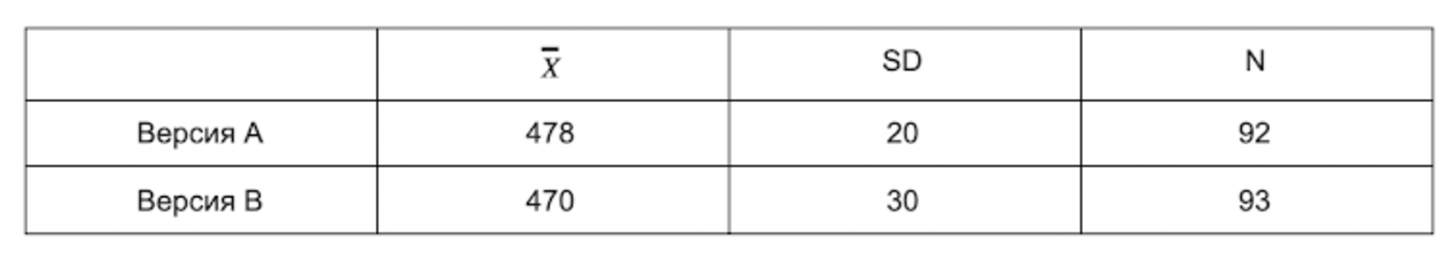

In [34]:
# Вводим исходные данные по выборкам
sample_1_mean, sample_2_mean = 478, 470 
sample_1_se, sample_2_se = 20, 30
sample_1_size, sample_2_size = 92, 93
# Генерируем нормальное распределение на основе введенных данных
sample_1 = np.random.normal(loc=sample_1_mean, scale=sample_1_se, size=sample_1_size)
sample_2 = np.random.normal(loc=sample_2_mean, scale=sample_2_se, size=sample_2_size)

In [35]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=sample_1, name='sample_1'))
fig.add_trace(go.Histogram(x=sample_2, name='sample_2'))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.5)
fig.show()

In [36]:
# tt тест
# Считаем статистику по выборкам нормальное распределение
tvalue, pvalue = stats.ttest_ind(sample_1, sample_2, equal_var=False)

md = sample_1_mean - sample_2_mean
se = md / tvalue

print(f"Difference between samples: {md}, standart error: {se}, p_value: {pvalue}")

if pvalue < .05:
    print(f"Sample # {1 if md > 0 else 2} mean is greater")
else:
    print("No significant difference Поправка Велша")

Difference between samples: 8, standart error: 3.2693228679880857, p_value: 0.015398739190096537
Sample # 1 mean is greater


In [37]:
expon_1 = stats.expon(loc=sample_1_mean, scale=sample_1_se).rvs(sample_1_size)
expon_2 = stats.expon(loc=sample_2_mean, scale=sample_2_se).rvs(sample_2_size)
fig = go.Figure()
fig.add_trace(go.Histogram(x=expon_1, name='expon_1'))
fig.add_trace(go.Histogram(x=expon_2, name='expon_2'))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

In [38]:
tvalue, pvalue = stats.mannwhitneyu(expon_1, expon_2)

md = expon_1.mean() - expon_2.mean()
se = md / tvalue

print(f"Difference between samples: {md}, standart error: {se}, p_value: {pvalue}")

if pvalue < .05:
    print(f"Sample # {1 if md > 0 else 2} mean is greater")
else:
    print("No significant difference")
md = expon_1.mean() - expon_2.mean()

Difference between samples: 2.4531496396344323, standart error: 0.0004970921255591555, p_value: 0.0714287973226783
No significant difference


Заача 5 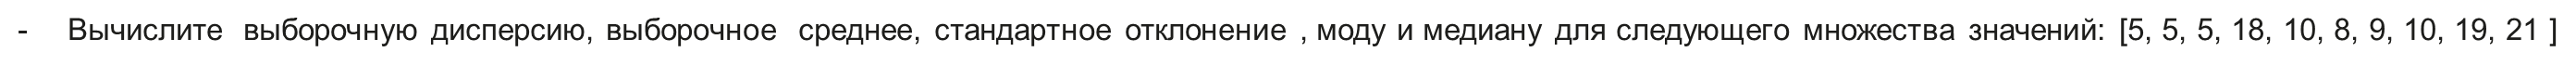

In [43]:
import numpy as np
a = np.array ([5,5,5,18, 10, 8,9, 10, 19, 21])

In [47]:
x=np.mean(a)
print (x)

11.0


In [48]:
x=np.median(a)
print(x)

9.5


In [49]:
x=np.std(a, ddof=1) 
print(x)

6.110100926607787


In [50]:
x=np.var(a, ddof=1) # Дисперсия
print(x)

37.333333333333336


In [51]:
stats.mode(a,keepdims=True) # Мода по х и у

ModeResult(mode=array([5]), count=array([3]))

Пример задачи

In [41]:
# Вводим исходные данные по выборкам
sample_1_mean, sample_2_mean = 470, 490 
sample_1_se, sample_2_se = 20, 30
sample_1_size, sample_2_size = 1000, 1000
# Генерируем нормальное распределение на основе введенных данных
sample_1 = np.random.normal(loc=sample_1_mean, scale=sample_1_se, size=sample_1_size)
sample_2 = np.random.normal(loc=sample_2_mean, scale=sample_2_se, size=sample_2_size)

In [42]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=sample_1, name='sample_1'))
fig.add_trace(go.Histogram(x=sample_2, name='sample_2'))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.5)
fig.show()

In [43]:
n_iter = 10_000
max_len = max(len(sample_1), len(sample_2))
sample_mean = []
for _ in range(n_iter):
    sample_control = np.random.choice(sample_1, size=max_len, replace=True)
    sample_treatment = np.random.choice(sample_2, size=max_len, replace=True)
    sample_mean.append(np.mean(sample_treatment - sample_control))

In [48]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=sample_mean, name='sample_mean'))
#fig.add_trace(go.Histogram(x=sample_2, name='sample_2'))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

In [49]:
import pandas as pd
pd.Series(sample_mean).quantile([.025, .5, .975])

0.025    17.581958
0.500    19.723999
0.975    21.900128
dtype: float64